<a href="https://colab.research.google.com/github/Oscar19922017/ModeloCredit2023/blob/main/2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) Librerias**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt ####
import seaborn as sns
from scipy import stats

# **2 Importar Datos**

In [14]:
df=pd.read_csv("https://raw.githubusercontent.com/Oscar19922017/ModeloCredit2023/main/BaseDepurada.csv")
cat_columns=pd.read_csv("https://raw.githubusercontent.com/Oscar19922017/ModeloCredit2023/main/cat_columns.csv")["variable"].tolist()
num_columns=pd.read_csv("https://raw.githubusercontent.com/Oscar19922017/ModeloCredit2023/main/num_columns.csv")["variable"].tolist()

In [15]:
df.shape

(30000, 25)

In [16]:
len(cat_columns)

10

In [17]:
cat_columns

['PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'Mora',
 'Genero_Homologado',
 'EducacionHomologada',
 'EstadoCivilHomologado']

In [18]:
len(num_columns)

14

In [19]:
num_columns

['MontoCredito',
 'Edad',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [20]:
df.head()

,ID,MontoCredito,Edad,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Mora,Genero_Homologado,EducacionHomologada,EstadoCivilHomologado
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,...,0.0,689.0,0.0,0.0,0.0,0.0,1,Masculino,Pregrado,Casado
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,Masculino,Pregrado,Soltero
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,Masculino,Pregrado,Soltero
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,Masculino,Pregrado,Casado
4,5,50000.0,57,-1,0,-1,0,0,0,8617.0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,Femenino,Pregrado,Casado


# **3) Análisis Exploratorio y Descriptivo de los Datos**

Es un enfoque inicial y esencial en el análisis de datos que permite comprender la estructura, las relaciones y las principales características de los datos antes de proceder a técnicas de modelado o inferencia estadística más complejas.

El EDA es un paso fundamental en cualquier proyecto de análisis de datos o ciencia de datos. Permite a los analistas familiarizarse con los datos, comprender sus peculiaridades y, a menudo, guiar el camino para los análisis subsiguientes.


* Visualizar la distribución de los datos.
* Identificar patrones y relaciones entre variables.
* Detectar anomalías o valores atípicos.
* Testear suposiciones o hipótesis.


* Histogramas: para visualizar la distribución univariada de una variable.
* Boxplots (diagramas de caja): para visualizar la distribución y detectar valores atípicos.
* Diagramas de dispersión (scatter plots): para explorar relaciones entre dos variables.
* Matrices de correlación: para identificar relaciones lineales entre variables.
* Mapas de calor (heatmaps): para visualizar matrices de * correlación o la distribución conjunta de dos variables categóricas.
* Gráficos de barras: para visualizar la distribución de variables categóricas

## **3.1) Análisis Univariado: variables categóricas**

### **Distribucción**

In [22]:
df["Mora"].value_counts()

0    23364
1     6636
Name: Mora, dtype: int64

In [23]:
df["Mora"].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: Mora, dtype: float64

**Gráficas**

In [49]:
homologacion_mora={0:"Pago",1:"No Pago"}

In [55]:
conteo_mora=df[["Mora"]]
conteo_mora["Mora"]=conteo_mora["Mora"].map(homologacion_mora)

<ipython-input-55-1fda85d2304a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conteo_mora["Mora"]=conteo_mora["Mora"].map(homologacion_mora)


In [70]:
colors={"#808080","#00FFFF"}

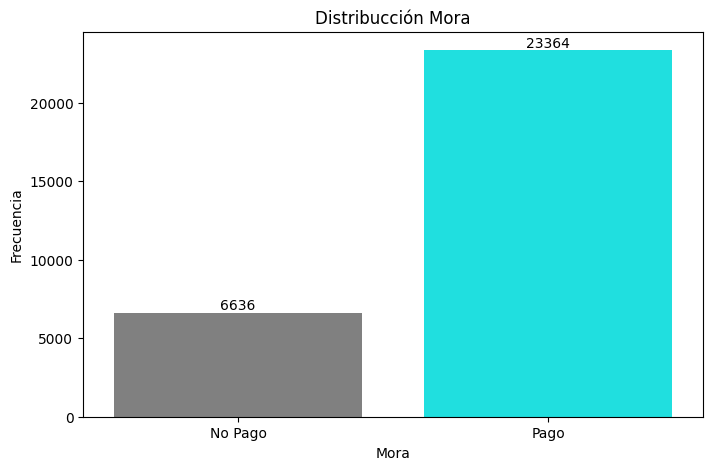

In [71]:
plt.figure(figsize=(8,5))
sns.set_palette(sns.color_palette(colors))
sns.countplot(data=conteo_mora,x="Mora")
plt.title("Distribucción Mora")
plt.ylabel("Frecuencia")
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(),
            f'{int(p.get_height())}',
            ha='center', va='bottom')
plt.show()

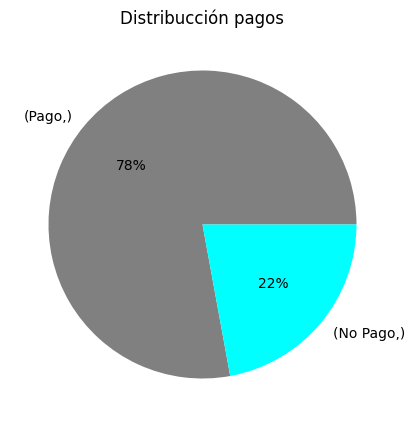

In [92]:
plt.figure(figsize=(8,5))
conteo_mora.value_counts().plot(kind="pie", autopct='%1.0f%%')
plt.title("Distribucción pagos")
plt.show()

In [122]:
labels=conteo_mora["Mora"].value_counts().index.tolist()
sizes=conteo_mora["Mora"].value_counts().values.tolist()

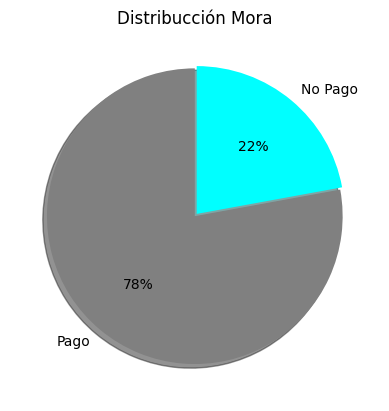

In [127]:
explode = (0, 0.02)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
plt.title("Distribucción Mora")
plt.show()

* 22% son usuarios que entraron de dafault vs 78% no han entrado en default. Distribucción desbalanceada

## **3.2) Análisis Univariado: variables Numéricas**

### **Distribucción**

In [138]:
valor_credito=df["MontoCredito"]

**Histograma**

Un histograma es una representación gráfica que muestra la distribución de frecuencia de un conjunto de datos continuos o discretos. En un histograma, el rango total de valores se divide en intervalos o "bins", y se cuenta cuántas veces caen los datos en cada intervalo. Luego, estos recuentos se representan como barras en un gráfico, donde la altura de cada barra representa la frecuencia de los datos en ese intervalo.

In [139]:
valor_credito.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: MontoCredito, dtype: float64

#### **Medidas de Tendencia Central**

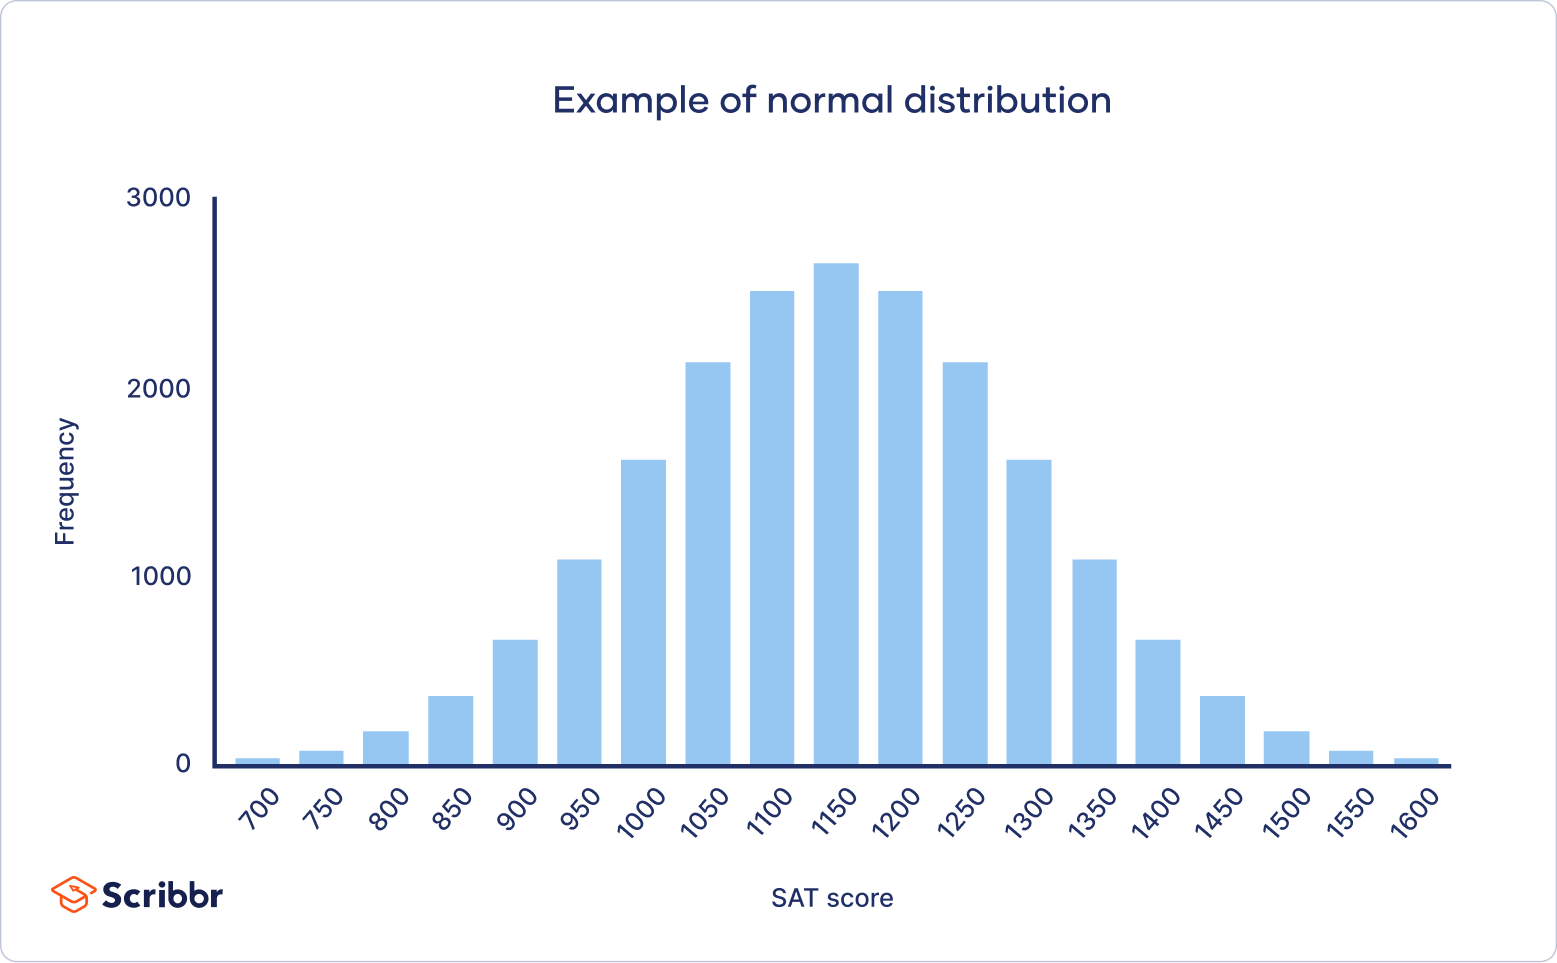

* El promedio, también conocido como media, es una medida estadística utilizada para representar un valor central o típico en un conjunto de datos numéricos. Se calcula sumando todos los valores en el conjunto y luego dividiendo esa suma por la cantidad total de valores. El promedio es una forma de resumir la tendencia central de un conjunto de datos y proporciona una idea general de la magnitud típica de los valores. Por ejemplo, considera el conjunto de datos: 10, 15, 20, 25, 30. El promedio se calcula sumando los valores y dividiendo por la cantidad de valores:

Promedio = (10 + 15 + 20 + 25 + 30) / 5 = 20

En este caso, el promedio de los valores es 20.

Es importante tener en cuenta que el promedio puede ser influenciado por valores atípicos o extremos en el conjunto de datos, ya que se basa en la suma de todos los valores. En situaciones en las que los valores atípicos son un problema, otras medidas de tendencia central, como la mediana o la moda, pueden ser más apropiadas para representar la "típica" magnitud de los datos.

* La mediana es una medida estadística de tendencia central que representa el valor que se encuentra en el centro de un conjunto de datos ordenados. En otras palabras, la mediana es el valor que separa al conjunto de datos en dos partes iguales: la mitad de los valores se encuentran por encima de la mediana y la mitad se encuentran por debajo.

Para calcular la mediana, primero debes ordenar los valores del conjunto de datos de manera ascendente o descendente y luego encontrar el valor que está exactamente en el medio. Si hay un número impar de valores, la mediana es simplemente el valor central. Si hay un número par de valores, la mediana es el promedio de los dos valores centrales.

La mediana es especialmente útil cuando se tienen valores atípicos o extremos en el conjunto de datos, ya que no se ve tan afectada por estos valores como lo es el promedio. Por lo tanto, puede dar una idea más robusta de la "típica" magnitud de los datos.

In [143]:
promedio_valor_credito=np.mean(valor_credito)
promedio_valor_credito

167484.32266666667

In [144]:
mediana_valor_credito=np.median(valor_credito)
mediana_valor_credito

140000.0

In [145]:
promedio_valor_credito-mediana_valor_credito

27484.322666666674

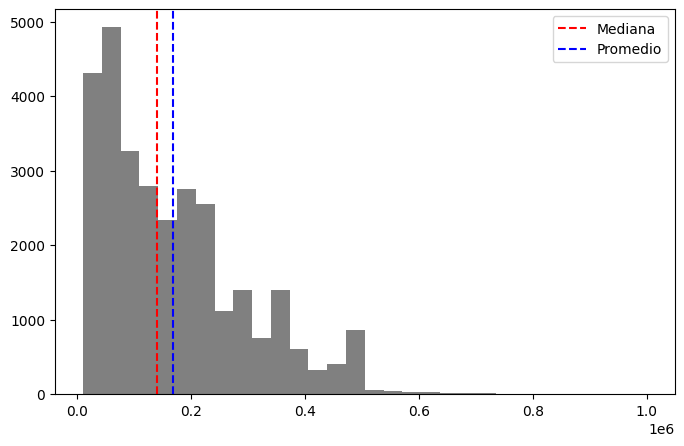

In [148]:
plt.figure(figsize=(8,5))
plt.axvline(mediana_valor_credito,color="red",linestyle="--",label="Mediana")
plt.axvline(promedio_valor_credito,color="blue",linestyle="--",label="Promedio")
plt.legend()
plt.hist(valor_credito,bins=30);

**Pruba de Normalidad**

Una prueba de hipótesis es una regla que especifica si se puede aceptar o rechazar una afirmación acerca de una población dependiendo de la evidencia proporcionada por una muestra de datos.

Un punto de decisión importante al trabajar con una muestra de datos es si utilizar métodos estadísticos paramétricos o no paramétricos. Los métodos estadísticos paramétricos asumen que los datos tienen una distribución conocida y específica, a menudo una distribución gaussiana. Si una muestra de datos no es gaussiana, entonces se violan los supuestos de las pruebas estadísticas paramétricas y deben usarse métodos estadísticos no paramétricos.

**Interpretación de una prueba**
* H0: El monto del credito proviene de una distribucción Normal
* Ha:El monto del credito No proviene de una distribucción Normal

p valor;

* p <= alfa : rechazar H0, no es normal.
* p> alpha : No rechazar H0, No significa que sea cierta normalidad, Significa que es muy probable que sea Normal


Prueba de Shapiro-Wilk Shapiro-Wilk evalúa una muestra de datos y cuantifica la probabilidad de que los datos se extraigan de una distribución gaussiana, llamada así por Samuel Shapiro y Martin Wilk.

En la práctica, se cree que la prueba de Shapiro-Wilk es una prueba confiable de normalidad, aunque se sugiere que la prueba puede ser adecuada para muestras de datos más pequeñas, por ejemplo, miles de observaciones o menos

D'Agostino's K-squared test La prueba de D'Agostino-Pearson verifica si la forma de la distribución es similar a la forma de la distribución normal. Esta es una combinación de la prueba de asimetría y la prueba de curtosis

In [149]:
alfa=0.05

In [150]:
stat,p_valor=stats.shapiro(valor_credito)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [151]:
p_valor

0.0

In [152]:
if (p_valor <0.05):
  print("Rechazo Normalidad")
else:
  print("La variables es muy probable que tenga una distribucción normal")

Rechazo Normalidad


# **Normalidad puede estar afectada por Datos Atipicos**